In [1]:
### Load EDA pkgs
import pandas as pd
import numpy as np

### Data Viz Pkgs
import matplotlib.pyplot as plt
import seaborn as sns

### Feature selection
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
## Model pkgs
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import cv
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics


#hcc_o = pd.read_csv ('./MI.data')
#hcc_o.to_csv ('./MI.csv', index=None)

In [2]:

co_result = pd.read_csv ('./csv/co_MICE.csv')
sp_result = pd.read_csv ('./csv/saperate_result.csv')
co_result.describe()

,2,3,4,5,6,7,9,10,11,12,...,104,105,106,107,108,109,110,111,112,124
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,61.842941,0.626471,0.557059,2.390588,1.227059,1.164706,1.390000,0.033529,3.567647,0.213529,...,0.115294,0.091765,0.282353,0.126471,0.665294,0.715882,0.745882,0.017647,0.201176,0.159412
std,11.279296,0.483883,0.838124,2.440661,1.039637,0.797982,1.088878,0.180067,3.051184,0.687691,...,0.399678,0.366075,0.450277,0.332477,0.472026,0.451126,0.435492,0.131704,0.400998,0.366167
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,70.000000,1.000000,1.000000,5.000000,2.000000,2.000000,2.000000,0.000000,7.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,92.000000,1.000000,3.000000,6.000000,4.000000,2.000000,3.000000,1.000000,7.000000,4.000000,...,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
from sklearn.utils import shuffle
co_result = shuffle(co_result)
sp_result = shuffle(sp_result)
co_result_tmp=co_result

C:\Users\_\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


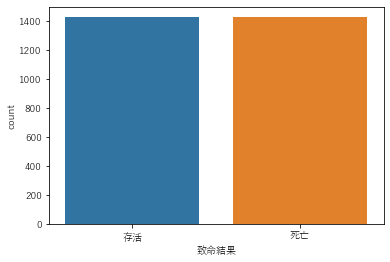

0    1429
1    1429
Name: 致命結果, dtype: int64

In [4]:
#全部一起upsample
allupsample=co_result
allupsample = shuffle(allupsample)
allupsample.columns=['年齡','性別','數量的心肌梗塞在病歷','病史中的勞力性心絞痛','上一年心絞痛功能等級','最近幾週（冠心病，冠心病）','存在原發性高血壓','有症狀的高血壓','動脈高血壓的持續時間','病史中存在慢性心力衰竭','觀察回憶中的心律失常','在病歷早產宮縮心房','病史中的室性早搏','病史中房顫的發作','持續形式的房顫（心房顫動）','心室顫動在病歷','病史中的室性陣發性心動過速','既往史中的一級 AV 阻滯','既往史中的三度 AV 阻滯','LBBB（前支）在病歷','病歷中的不完全','病史中的完全','不完全RBBB在病歷','在病歷（NP10）完整RBBB','糖尿病的既往病史','病史中的肥胖','甲狀腺毒症在病歷','在病歷慢性支氣管炎','在病歷31.Obstructive慢性支氣管炎','支氣管哮喘的既往史','慢性肺炎（zab_leg_04）','在既往病史（zab_leg_06）','重症監護室的收縮壓','重症監護室的舒張壓','入住重症監護病房時的肺水腫','入住重症監護病房時的心源性休克','入住重症監護病房時（或在院前階段）房顫發作 (MP_TP_POST)','入住重症監護病房時（或入院前階段）室上性心動過速的發作 (SVT_POST)','入住重症監護病房時（或在院前階段）室性心動過速的發作 (GT_POST)','心室顫動在入住重症監護病房時（或在院前階段）(FIB_G_POST)','存在前壁心肌梗塞（左心室）（V1：V4 導聯的心電圖變化）（ant_im）','存在側向心肌梗死（左心室）（ECG）導聯變化','存在下壁心肌梗死（左心室）（心電圖 III、AVF、II 導聯的變化）','存在後部心肌梗死（左心室）（V7 的心電圖變化：V9，導聯 V1 – V3 的交互變化）','右心室心肌梗塞 (IM_PG_P)','入院時的心電圖節律：竇性（心率 60-90）','ECG節律：心房纖維性顫動（ritm_ecg_p_02）','ECG節律：心房（ritm_ecg_p_04）','入院時心電圖節律：室性（ritm_ecg_p_06）','入院時心電圖節律心率高於 90 的竇（心動過速）','入院時心電圖心律：竇性心率低於 60（心動過緩','過早收縮 56入院時的心電圖 (n_r_ecg_p_01)','入院時心電圖頻繁出現房性早搏 (n_p2_g)ec','入院時心電圖上的室性早搏 (n_r_ecg_p_03)','入院時心電圖頻發室性早搏到醫院 (n_r_ecg_p_04)','入院時心電圖上的房顫發作 (n_r_5s_cg_)','入院時 ECG 上持續存在的房顫形式 (n_r_ecg_p_06)','陣發性心動過速的心室性心動過速 ECG','入院到醫院的時間（n_r_ecg_p_09）上ECG室性心動過速63發作','入院時心電圖上的心室顫動 (n_r_ecg_p_10)','入院時心電圖上的竇房阻滯 (n_p_ecg_p_01)','入院時心電圖一級房室傳導阻滯 (n_p_ecg_p_03)','1-6 度二度類型入院時心電圖顯示房室傳導阻滯（Mobitz I/Wenckebach）','入院時 (n_p_ecg_p_05) 心電圖顯示 2 型二度 AV 阻滯','入院時 ECG 上的 - 度 AV 阻滯 (n_p_ecg_p_06)','入院時 ECG 上的 LBBB（前支）到醫院 (n_p_ecg_p_07)','入院時心電圖上的 LBBB（後支）','不完全LBBB心電圖入院到醫院的時間（n_p_ecg_p_09）','入院時在 ECG 上完成 LBBB (n_p_ecg_p_10)','入院時 RBBB 不完整的 ECG醫院 (n_p_ecg_p_11)','入院時完成心電圖上的 RBBB (n_p_ecg_p_12)','溶栓治療（fibr_ter_01）','1米IU（fibr_ter_02）','溶栓治療（fibr_ter_03）','鏈蛋白酶 (fibr_ter_05) 的纖溶治療','IU溶栓治療（fibr_ter_06）','250k IU (fibr_ter_07) 的纖溶治療','纖溶治療由 1.5 breptionter_0 1.5 breptionter_0','低鉀血症 (GIPO_K)','血清鉀含量 (K_BLOOD) (mmol/L)','血清鈉增加（超過 150 mmol/L）（GIPER_Na）','血清鈉含量（Na_BLOOD）（mmol/L）','血清 AlAT 含量 (ALT_BLOOD) (IU/L)','血清 AsAT 含量 (AST_BLOOD) (IU/L)','白細胞計數（每升十億）（L_BLOOD）','ESR（紅細胞沉降率）（ROE）（Ð¼Ð¼','從CHD開始到醫院經過的時間（TIME_B_S）','入院前幾個小時疼痛復發期間（R_AB_1_n）','疼痛復發在住院期間的第二天（R_AB_2_n','第三天疼痛復發住院時間（R_AB_3_n）','ICU 中液態硝酸鹽的使用 (NITR_S)','住院最初幾個小時在 ICU 中使用阿片類藥物(NA_R_1_n)','住院第二天在 ICU 使用阿片類藥物（NA_R_2_n）','使用的阿片類藥物在醫院期間（NA_R_3_n）的第三天ICU','住院最初幾個小時在 ICU 中使用非甾體抗炎藥 (NOT_NA_1_n)','在醫院期間（NOT_NA_2_n）的第二天的ICU 104使用NSAID','住院第三天在 ICU 中使用非甾體抗炎藥（NOT_NA_3_n）','ICU 中利多卡因的使用 (LID_S_n)','在ICUβ受體阻滯劑（B_BLOK_S_n）','使用在ICU鈣通道阻滯劑（ANT_CA_S_n）','d°抗凝血劑（肝素）在ICU（GEPAR_S_n）的用途','ICU 中乙酰水楊酸的使用 (ASP_S_n)','在 ICU 中使用 Ticlid (TIKL_S_n)','在 ICU 中使用 Trental（TRENT_S_n）','致命結果']

from sklearn.utils import resample

import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

plt.rcParams['font.sans-serif']=['simhei']
plt.rcParams['font.family']='Yu Gothic' 
plt.rcParams['axes.unicode_minus'] = False
### first we concatnate x_tran and y_train
Resample_data = allupsample
# separate minority and majority classes
Resample_data = shuffle(Resample_data)
alive = Resample_data[Resample_data.致命結果==0]
dead = Resample_data[Resample_data.致命結果>0]
# upsample minority
dead_upsampled = resample(dead,
                          replace=True, # sample with replacement
                          n_samples=len(alive), # match number in majority class
                          random_state=27) # reproducible results
# combine majority and upsampled minority
allupsample = pd.concat([alive, dead_upsampled])

# check new class counts
allupsample.致命結果.value_counts()
new_mort = sns.countplot(allupsample['致命結果'])
new_mort.set_xticklabels(['存活', '死亡'])
plt.show()
allupsample = shuffle(allupsample)
allupsample['致命結果'].value_counts()

In [5]:
xfeatures = allupsample[['年齡','性別','數量的心肌梗塞在病歷','病史中的勞力性心絞痛','上一年心絞痛功能等級','最近幾週（冠心病，冠心病）','存在原發性高血壓','有症狀的高血壓','動脈高血壓的持續時間',
                '病史中存在慢性心力衰竭','觀察回憶中的心律失常','在病歷早產宮縮心房','病史中的室性早搏','病史中房顫的發作','持續形式的房顫（心房顫動）','心室顫動在病歷','病史中的室性陣發性心動過速',
                '既往史中的一級 AV 阻滯','既往史中的三度 AV 阻滯','LBBB（前支）在病歷','病歷中的不完全','病史中的完全','不完全RBBB在病歷','在病歷（NP10）完整RBBB','糖尿病的既往病史','病史中的肥胖',
                '甲狀腺毒症在病歷','在病歷慢性支氣管炎','在病歷31.Obstructive慢性支氣管炎','支氣管哮喘的既往史','慢性肺炎（zab_leg_04）','在既往病史（zab_leg_06）','重症監護室的收縮壓',
                '重症監護室的舒張壓','入住重症監護病房時的肺水腫','入住重症監護病房時的心源性休克','入住重症監護病房時（或在院前階段）房顫發作 (MP_TP_POST)',
                '入住重症監護病房時（或入院前階段）室上性心動過速的發作 (SVT_POST)','入住重症監護病房時（或在院前階段）室性心動過速的發作 (GT_POST)','心室顫動在入住重症監護病房時（或在院前階段）(FIB_G_POST)',
                '存在前壁心肌梗塞（左心室）（V1：V4 導聯的心電圖變化）（ant_im）','存在側向心肌梗死（左心室）（ECG）導聯變化','存在下壁心肌梗死（左心室）（心電圖 III、AVF、II 導聯的變化）',
                '存在後部心肌梗死（左心室）（V7 的心電圖變化：V9，導聯 V1 – V3 的交互變化）','右心室心肌梗塞 (IM_PG_P)','入院時的心電圖節律：竇性（心率 60-90）','ECG節律：心房纖維性顫動（ritm_ecg_p_02）',
                'ECG節律：心房（ritm_ecg_p_04）','入院時心電圖節律：室性（ritm_ecg_p_06）','入院時心電圖節律心率高於 90 的竇（心動過速）','入院時心電圖心律：竇性心率低於 60（心動過緩',
                '過早收縮 56入院時的心電圖 (n_r_ecg_p_01)','入院時心電圖頻繁出現房性早搏 (n_p2_g)ec','入院時心電圖上的室性早搏 (n_r_ecg_p_03)','入院時心電圖頻發室性早搏到醫院 (n_r_ecg_p_04)',
                '入院時心電圖上的房顫發作 (n_r_5s_cg_)','入院時 ECG 上持續存在的房顫形式 (n_r_ecg_p_06)','陣發性心動過速的心室性心動過速 ECG','入院到醫院的時間（n_r_ecg_p_09）上ECG室性心動過速63發作',
                '入院時心電圖上的心室顫動 (n_r_ecg_p_10)','入院時心電圖上的竇房阻滯 (n_p_ecg_p_01)','入院時心電圖一級房室傳導阻滯 (n_p_ecg_p_03)',
                '1-6 度二度類型入院時心電圖顯示房室傳導阻滯（Mobitz I/Wenckebach）','入院時 (n_p_ecg_p_05) 心電圖顯示 2 型二度 AV 阻滯','入院時 ECG 上的 - 度 AV 阻滯 (n_p_ecg_p_06)',
                '入院時 ECG 上的 LBBB（前支）到醫院 (n_p_ecg_p_07)','入院時心電圖上的 LBBB（後支）','不完全LBBB心電圖入院到醫院的時間（n_p_ecg_p_09）','入院時在 ECG 上完成 LBBB (n_p_ecg_p_10)',
                '入院時 RBBB 不完整的 ECG醫院 (n_p_ecg_p_11)','入院時完成心電圖上的 RBBB (n_p_ecg_p_12)','溶栓治療（fibr_ter_01）','1米IU（fibr_ter_02）','溶栓治療（fibr_ter_03）',
                '鏈蛋白酶 (fibr_ter_05) 的纖溶治療','IU溶栓治療（fibr_ter_06）','250k IU (fibr_ter_07) 的纖溶治療','纖溶治療由 1.5 breptionter_0 1.5 breptionter_0','低鉀血症 (GIPO_K)',
                '血清鉀含量 (K_BLOOD) (mmol/L)','血清鈉增加（超過 150 mmol/L）（GIPER_Na）','血清鈉含量（Na_BLOOD）（mmol/L）','血清 AlAT 含量 (ALT_BLOOD) (IU/L)','血清 AsAT 含量 (AST_BLOOD) (IU/L)',
                '白細胞計數（每升十億）（L_BLOOD）','ESR（紅細胞沉降率）（ROE）（Ð¼Ð¼','從CHD開始到醫院經過的時間（TIME_B_S）','入院前幾個小時疼痛復發期間（R_AB_1_n）','疼痛復發在住院期間的第二天（R_AB_2_n',
                '第三天疼痛復發住院時間（R_AB_3_n）','ICU 中液態硝酸鹽的使用 (NITR_S)','住院最初幾個小時在 ICU 中使用阿片類藥物(NA_R_1_n)','住院第二天在 ICU 使用阿片類藥物（NA_R_2_n）',
                '使用的阿片類藥物在醫院期間（NA_R_3_n）的第三天ICU','住院最初幾個小時在 ICU 中使用非甾體抗炎藥 (NOT_NA_1_n)','在醫院期間（NOT_NA_2_n）的第二天的ICU 104使用NSAID',
                '住院第三天在 ICU 中使用非甾體抗炎藥（NOT_NA_3_n）','ICU 中利多卡因的使用 (LID_S_n)','在ICUβ受體阻滯劑（B_BLOK_S_n）','使用在ICU鈣通道阻滯劑（ANT_CA_S_n）',
                'd°抗凝血劑（肝素）在ICU（GEPAR_S_n）的用途','ICU 中乙酰水楊酸的使用 (ASP_S_n)','在 ICU 中使用 Ticlid (TIKL_S_n)','在 ICU 中使用 Trental（TRENT_S_n）'
                ]]
ylabels = allupsample['致命結果']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(xfeatures, ylabels, test_size=0.3, random_state=0)
y_train_s

1514    1
1437    1
1592    1
384     0
684     0
       ..
1165    0
1547    1
1503    1
537     0
1356    0
Name: 致命結果, Length: 2000, dtype: int64

In [6]:
#DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_s, y_train_s)
clf.score(X_test_s,y_test_s)

0.921911421911422

In [7]:
# knn
knn = KNeighborsClassifier()
knn.fit(X_train_s,y_train_s)
knn.score(X_test_s, y_test_s)

0.8286713286713286

In [8]:
#LogisticRegression
logit = LogisticRegression(max_iter=5000, class_weight='balanced',penalty='l2')
logit.fit(X_train_s,y_train_s)
logit.score(X_test_s,y_test_s)

0.8356643356643356

In [9]:
#RandomForestClassifier
rnf = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced")
rnf.fit(X_train_s,y_train_s)
rnf.score(X_test_s,y_test_s)

0.9848484848484849

In [10]:
clf = XGBClassifier(
        #樹的個數
        n_estimators=17,
        # 如同學習率
        learning_rate= 0.3, 
        # 構建樹的深度，越大越容易過擬合    
        max_depth=16, 
        # 隨機取樣訓練樣本 訓練例項的子取樣比
        subsample=1, 
        # 用於控制是否後剪枝的引數,越大越保守，一般0.1、0.2這樣子
        gamma=0, 
        # 控制模型複雜度的權重值的L2正則化項引數，引數越大，模型越不容易過擬合。
        reg_lambda=1,  
        
        #最大增量步長，我們允許每個樹的權重估計。
        max_delta_step=0,
        # 生成樹時進行的列取樣 
        colsample_bytree=1, 

        # 這個引數預設是 1，是每個葉子裡面 h 的和至少是多少，對正負樣本不均衡時的 0-1 分類而言
        # 假設 h 在 0.01 附近，min_child_weight 為 1 意味著葉子節點中最少需要包含 100 個樣本。
        #這個引數非常影響結果，控制葉子節點中二階導的和的最小值，該引數值越小，越容易 overfitting。
        min_child_weight=1, 

        #隨機種子
        seed=100000,
        
        # L1 正則項引數
#        reg_alpha=0,
        
        #如果取值大於0的話，在類別樣本不平衡的情況下有助於快速收斂。平衡正負權重
        #scale_pos_weight=1,
        
        #多分類的問題 指定學習任務和相應的學習目標
        #objective= 'multi:softmax', 
        
        # 類別數，多分類與 multisoftmax 並用
        #num_class=2,
        
        # 設定成1則沒有執行資訊輸出，最好是設定為0.是否在執行升級時列印訊息。
        #silent=0. ,
        # cpu 執行緒數 預設最大
#        nthread=4,
    
        #eval_metric= 'auc'
)

# 模型 訓練
clf.fit(X_train_s,y_train_s,eval_metric='auc')
# 預測值
y_pred=clf.predict(X_test_s)
# 真實值 賦值
y_true= y_test_s

# 計算精度
print("Accuracy : %.4g" % metrics.accuracy_score(y_true, y_pred))

C:\Users\_\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy : 0.9534


In [11]:
# making predictions on the test data and confusion matrix
y_pred = clf.predict(X_test_s)
cm = confusion_matrix(y_test_s,y_pred)
print(cm)
print('Model Accuracy Score:', accuracy_score(y_test_s,y_pred))

[[400  37]
 [  3 418]]
Model Accuracy Score: 0.9533799533799534


In [12]:
import shap
shap.initjs()
## shap_values
explainer = shap.TreeExplainer(clf,X_train_s)
shap_values = explainer.shap_values(X_test_s)

Glyph 37232 missing from current font.
Glyph 37232 missing from current font.


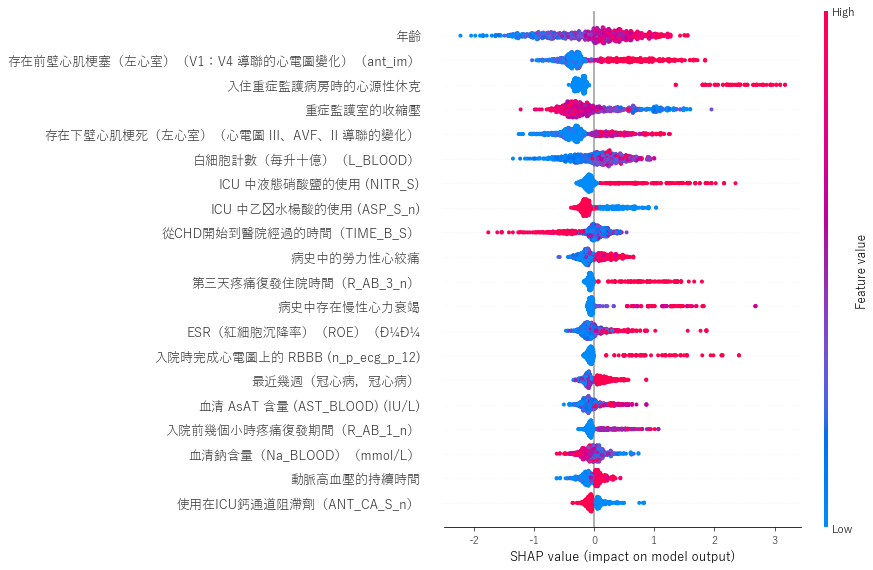

In [13]:
shap.summary_plot(shap_values,X_test_s)

In [14]:
#僅有train進行upsample
#切分資料集
from sklearn.model_selection import train_test_split
from sklearn import metrics
from  sklearn.datasets  import  make_hastie_10_2
from xgboost.sklearn import XGBClassifier
upsample=co_result
upsample = shuffle(upsample)
upsample.columns=['年齡','性別','數量的心肌梗塞在病歷','病史中的勞力性心絞痛','上一年心絞痛功能等級','最近幾週（冠心病，冠心病）','存在原發性高血壓','有症狀的高血壓','動脈高血壓的持續時間','病史中存在慢性心力衰竭','觀察回憶中的心律失常','在病歷早產宮縮心房','病史中的室性早搏','病史中房顫的發作','持續形式的房顫（心房顫動）','心室顫動在病歷','病史中的室性陣發性心動過速','既往史中的一級 AV 阻滯','既往史中的三度 AV 阻滯','LBBB（前支）在病歷','病歷中的不完全','病史中的完全','不完全RBBB在病歷','在病歷（NP10）完整RBBB','糖尿病的既往病史','病史中的肥胖','甲狀腺毒症在病歷','在病歷慢性支氣管炎','在病歷31.Obstructive慢性支氣管炎','支氣管哮喘的既往史','慢性肺炎（zab_leg_04）','在既往病史（zab_leg_06）','重症監護室的收縮壓','重症監護室的舒張壓','入住重症監護病房時的肺水腫','入住重症監護病房時的心源性休克','入住重症監護病房時（或在院前階段）房顫發作 (MP_TP_POST)','入住重症監護病房時（或入院前階段）室上性心動過速的發作 (SVT_POST)','入住重症監護病房時（或在院前階段）室性心動過速的發作 (GT_POST)','心室顫動在入住重症監護病房時（或在院前階段）(FIB_G_POST)','存在前壁心肌梗塞（左心室）（V1：V4 導聯的心電圖變化）（ant_im）','存在側向心肌梗死（左心室）（ECG）導聯變化','存在下壁心肌梗死（左心室）（心電圖 III、AVF、II 導聯的變化）','存在後部心肌梗死（左心室）（V7 的心電圖變化：V9，導聯 V1 – V3 的交互變化）','右心室心肌梗塞 (IM_PG_P)','入院時的心電圖節律：竇性（心率 60-90）','ECG節律：心房纖維性顫動（ritm_ecg_p_02）','ECG節律：心房（ritm_ecg_p_04）','入院時心電圖節律：室性（ritm_ecg_p_06）','入院時心電圖節律心率高於 90 的竇（心動過速）','入院時心電圖心律：竇性心率低於 60（心動過緩','過早收縮 56入院時的心電圖 (n_r_ecg_p_01)','入院時心電圖頻繁出現房性早搏 (n_p2_g)ec','入院時心電圖上的室性早搏 (n_r_ecg_p_03)','入院時心電圖頻發室性早搏到醫院 (n_r_ecg_p_04)','入院時心電圖上的房顫發作 (n_r_5s_cg_)','入院時 ECG 上持續存在的房顫形式 (n_r_ecg_p_06)','陣發性心動過速的心室性心動過速 ECG','入院到醫院的時間（n_r_ecg_p_09）上ECG室性心動過速63發作','入院時心電圖上的心室顫動 (n_r_ecg_p_10)','入院時心電圖上的竇房阻滯 (n_p_ecg_p_01)','入院時心電圖一級房室傳導阻滯 (n_p_ecg_p_03)','1-6 度二度類型入院時心電圖顯示房室傳導阻滯（Mobitz I/Wenckebach）','入院時 (n_p_ecg_p_05) 心電圖顯示 2 型二度 AV 阻滯','入院時 ECG 上的 - 度 AV 阻滯 (n_p_ecg_p_06)','入院時 ECG 上的 LBBB（前支）到醫院 (n_p_ecg_p_07)','入院時心電圖上的 LBBB（後支）','不完全LBBB心電圖入院到醫院的時間（n_p_ecg_p_09）','入院時在 ECG 上完成 LBBB (n_p_ecg_p_10)','入院時 RBBB 不完整的 ECG醫院 (n_p_ecg_p_11)','入院時完成心電圖上的 RBBB (n_p_ecg_p_12)','溶栓治療（fibr_ter_01）','1米IU（fibr_ter_02）','溶栓治療（fibr_ter_03）','鏈蛋白酶 (fibr_ter_05) 的纖溶治療','IU溶栓治療（fibr_ter_06）','250k IU (fibr_ter_07) 的纖溶治療','纖溶治療由 1.5 breptionter_0 1.5 breptionter_0','低鉀血症 (GIPO_K)','血清鉀含量 (K_BLOOD) (mmol/L)','血清鈉增加（超過 150 mmol/L）（GIPER_Na）','血清鈉含量（Na_BLOOD）（mmol/L）','血清 AlAT 含量 (ALT_BLOOD) (IU/L)','血清 AsAT 含量 (AST_BLOOD) (IU/L)','白細胞計數（每升十億）（L_BLOOD）','ESR（紅細胞沉降率）（ROE）（Ð¼Ð¼','從CHD開始到醫院經過的時間（TIME_B_S）','入院前幾個小時疼痛復發期間（R_AB_1_n）','疼痛復發在住院期間的第二天（R_AB_2_n','第三天疼痛復發住院時間（R_AB_3_n）','ICU 中液態硝酸鹽的使用 (NITR_S)','住院最初幾個小時在 ICU 中使用阿片類藥物(NA_R_1_n)','住院第二天在 ICU 使用阿片類藥物（NA_R_2_n）','使用的阿片類藥物在醫院期間（NA_R_3_n）的第三天ICU','住院最初幾個小時在 ICU 中使用非甾體抗炎藥 (NOT_NA_1_n)','在醫院期間（NOT_NA_2_n）的第二天的ICU 104使用NSAID','住院第三天在 ICU 中使用非甾體抗炎藥（NOT_NA_3_n）','ICU 中利多卡因的使用 (LID_S_n)','在ICUβ受體阻滯劑（B_BLOK_S_n）','使用在ICU鈣通道阻滯劑（ANT_CA_S_n）','d°抗凝血劑（肝素）在ICU（GEPAR_S_n）的用途','ICU 中乙酰水楊酸的使用 (ASP_S_n)','在 ICU 中使用 Ticlid (TIKL_S_n)','在 ICU 中使用 Trental（TRENT_S_n）','致命結果']
xfeatures = upsample[['年齡','性別','數量的心肌梗塞在病歷','病史中的勞力性心絞痛','上一年心絞痛功能等級','最近幾週（冠心病，冠心病）','存在原發性高血壓','有症狀的高血壓','動脈高血壓的持續時間',
                '病史中存在慢性心力衰竭','觀察回憶中的心律失常','在病歷早產宮縮心房','病史中的室性早搏','病史中房顫的發作','持續形式的房顫（心房顫動）','心室顫動在病歷','病史中的室性陣發性心動過速',
                '既往史中的一級 AV 阻滯','既往史中的三度 AV 阻滯','LBBB（前支）在病歷','病歷中的不完全','病史中的完全','不完全RBBB在病歷','在病歷（NP10）完整RBBB','糖尿病的既往病史','病史中的肥胖',
                '甲狀腺毒症在病歷','在病歷慢性支氣管炎','在病歷31.Obstructive慢性支氣管炎','支氣管哮喘的既往史','慢性肺炎（zab_leg_04）','在既往病史（zab_leg_06）','重症監護室的收縮壓',
                '重症監護室的舒張壓','入住重症監護病房時的肺水腫','入住重症監護病房時的心源性休克','入住重症監護病房時（或在院前階段）房顫發作 (MP_TP_POST)',
                '入住重症監護病房時（或入院前階段）室上性心動過速的發作 (SVT_POST)','入住重症監護病房時（或在院前階段）室性心動過速的發作 (GT_POST)','心室顫動在入住重症監護病房時（或在院前階段）(FIB_G_POST)',
                '存在前壁心肌梗塞（左心室）（V1：V4 導聯的心電圖變化）（ant_im）','存在側向心肌梗死（左心室）（ECG）導聯變化','存在下壁心肌梗死（左心室）（心電圖 III、AVF、II 導聯的變化）',
                '存在後部心肌梗死（左心室）（V7 的心電圖變化：V9，導聯 V1 – V3 的交互變化）','右心室心肌梗塞 (IM_PG_P)','入院時的心電圖節律：竇性（心率 60-90）','ECG節律：心房纖維性顫動（ritm_ecg_p_02）',
                'ECG節律：心房（ritm_ecg_p_04）','入院時心電圖節律：室性（ritm_ecg_p_06）','入院時心電圖節律心率高於 90 的竇（心動過速）','入院時心電圖心律：竇性心率低於 60（心動過緩',
                '過早收縮 56入院時的心電圖 (n_r_ecg_p_01)','入院時心電圖頻繁出現房性早搏 (n_p2_g)ec','入院時心電圖上的室性早搏 (n_r_ecg_p_03)','入院時心電圖頻發室性早搏到醫院 (n_r_ecg_p_04)',
                '入院時心電圖上的房顫發作 (n_r_5s_cg_)','入院時 ECG 上持續存在的房顫形式 (n_r_ecg_p_06)','陣發性心動過速的心室性心動過速 ECG','入院到醫院的時間（n_r_ecg_p_09）上ECG室性心動過速63發作',
                '入院時心電圖上的心室顫動 (n_r_ecg_p_10)','入院時心電圖上的竇房阻滯 (n_p_ecg_p_01)','入院時心電圖一級房室傳導阻滯 (n_p_ecg_p_03)',
                '1-6 度二度類型入院時心電圖顯示房室傳導阻滯（Mobitz I/Wenckebach）','入院時 (n_p_ecg_p_05) 心電圖顯示 2 型二度 AV 阻滯','入院時 ECG 上的 - 度 AV 阻滯 (n_p_ecg_p_06)',
                '入院時 ECG 上的 LBBB（前支）到醫院 (n_p_ecg_p_07)','入院時心電圖上的 LBBB（後支）','不完全LBBB心電圖入院到醫院的時間（n_p_ecg_p_09）','入院時在 ECG 上完成 LBBB (n_p_ecg_p_10)',
                '入院時 RBBB 不完整的 ECG醫院 (n_p_ecg_p_11)','入院時完成心電圖上的 RBBB (n_p_ecg_p_12)','溶栓治療（fibr_ter_01）','1米IU（fibr_ter_02）','溶栓治療（fibr_ter_03）',
                '鏈蛋白酶 (fibr_ter_05) 的纖溶治療','IU溶栓治療（fibr_ter_06）','250k IU (fibr_ter_07) 的纖溶治療','纖溶治療由 1.5 breptionter_0 1.5 breptionter_0','低鉀血症 (GIPO_K)',
                '血清鉀含量 (K_BLOOD) (mmol/L)','血清鈉增加（超過 150 mmol/L）（GIPER_Na）','血清鈉含量（Na_BLOOD）（mmol/L）','血清 AlAT 含量 (ALT_BLOOD) (IU/L)','血清 AsAT 含量 (AST_BLOOD) (IU/L)',
                '白細胞計數（每升十億）（L_BLOOD）','ESR（紅細胞沉降率）（ROE）（Ð¼Ð¼','從CHD開始到醫院經過的時間（TIME_B_S）','入院前幾個小時疼痛復發期間（R_AB_1_n）','疼痛復發在住院期間的第二天（R_AB_2_n',
                '第三天疼痛復發住院時間（R_AB_3_n）','ICU 中液態硝酸鹽的使用 (NITR_S)','住院最初幾個小時在 ICU 中使用阿片類藥物(NA_R_1_n)','住院第二天在 ICU 使用阿片類藥物（NA_R_2_n）',
                '使用的阿片類藥物在醫院期間（NA_R_3_n）的第三天ICU','住院最初幾個小時在 ICU 中使用非甾體抗炎藥 (NOT_NA_1_n)','在醫院期間（NOT_NA_2_n）的第二天的ICU 104使用NSAID',
                '住院第三天在 ICU 中使用非甾體抗炎藥（NOT_NA_3_n）','ICU 中利多卡因的使用 (LID_S_n)','在ICUβ受體阻滯劑（B_BLOK_S_n）','使用在ICU鈣通道阻滯劑（ANT_CA_S_n）',
                'd°抗凝血劑（肝素）在ICU（GEPAR_S_n）的用途','ICU 中乙酰水楊酸的使用 (ASP_S_n)','在 ICU 中使用 Ticlid (TIKL_S_n)','在 ICU 中使用 Trental（TRENT_S_n）'
                ]]
ylabels = upsample['致命結果']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(xfeatures, ylabels, test_size=0.3, random_state=0)

In [15]:
upsample_train =X_train_s

In [16]:
upsample_train['致命結果']=y_train_s


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [17]:
upsample_train

,年齡,性別,數量的心肌梗塞在病歷,病史中的勞力性心絞痛,上一年心絞痛功能等級,最近幾週（冠心病，冠心病）,存在原發性高血壓,有症狀的高血壓,動脈高血壓的持續時間,病史中存在慢性心力衰竭,...,在醫院期間（NOT_NA_2_n）的第二天的ICU 104使用NSAID,住院第三天在 ICU 中使用非甾體抗炎藥（NOT_NA_3_n）,ICU 中利多卡因的使用 (LID_S_n),在ICUβ受體阻滯劑（B_BLOK_S_n）,使用在ICU鈣通道阻滯劑（ANT_CA_S_n）,d°抗凝血劑（肝素）在ICU（GEPAR_S_n）的用途,ICU 中乙酰水楊酸的使用 (ASP_S_n),在 ICU 中使用 Ticlid (TIKL_S_n),在 ICU 中使用 Trental（TRENT_S_n）,致命結果
132,64,1,0,4,2,2,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
382,45,1,2,0,0,2,2,0,5,0,...,0,0,0,1,1,1,1,0,0,0
657,68,0,1,2,2,1,2,0,1,0,...,2,2,0,0,1,1,1,0,0,0
1389,60,0,1,2,2,2,2,0,1,0,...,0,0,0,1,1,1,1,0,0,0
195,55,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,46,1,1,6,2,1,2,0,6,0,...,1,0,0,0,1,1,1,0,0,0
1464,55,1,0,0,0,0,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
764,36,1,0,0,0,0,2,0,2,0,...,0,0,0,0,0,1,1,0,0,0
450,72,0,2,2,2,1,3,0,7,0,...,0,0,0,0,1,1,1,0,0,0


Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


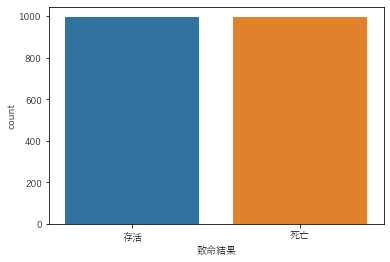

In [18]:
from sklearn.utils import resample

import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

plt.rcParams['font.sans-serif']=['simhei']
plt.rcParams['font.family']='Yu Gothic' 
plt.rcParams['axes.unicode_minus'] = False
### first we concatnate x_tran and y_train
Resample_data = upsample_train
# separate minority and majority classes
Resample_data.columns=['年齡','性別','數量的心肌梗塞在病歷','病史中的勞力性心絞痛','上一年心絞痛功能等級','最近幾週（冠心病，冠心病）','存在原發性高血壓','有症狀的高血壓','動脈高血壓的持續時間','病史中存在慢性心力衰竭','觀察回憶中的心律失常','在病歷早產宮縮心房','病史中的室性早搏','病史中房顫的發作','持續形式的房顫（心房顫動）','心室顫動在病歷','病史中的室性陣發性心動過速','既往史中的一級 AV 阻滯','既往史中的三度 AV 阻滯','LBBB（前支）在病歷','病歷中的不完全','病史中的完全','不完全RBBB在病歷','在病歷（NP10）完整RBBB','糖尿病的既往病史','病史中的肥胖','甲狀腺毒症在病歷','在病歷慢性支氣管炎','在病歷31.Obstructive慢性支氣管炎','支氣管哮喘的既往史','慢性肺炎（zab_leg_04）','在既往病史（zab_leg_06）','重症監護室的收縮壓','重症監護室的舒張壓','入住重症監護病房時的肺水腫','入住重症監護病房時的心源性休克','入住重症監護病房時（或在院前階段）房顫發作 (MP_TP_POST)','入住重症監護病房時（或入院前階段）室上性心動過速的發作 (SVT_POST)','入住重症監護病房時（或在院前階段）室性心動過速的發作 (GT_POST)','心室顫動在入住重症監護病房時（或在院前階段）(FIB_G_POST)','存在前壁心肌梗塞（左心室）（V1：V4 導聯的心電圖變化）（ant_im）','存在側向心肌梗死（左心室）（ECG）導聯變化','存在下壁心肌梗死（左心室）（心電圖 III、AVF、II 導聯的變化）','存在後部心肌梗死（左心室）（V7 的心電圖變化：V9，導聯 V1 – V3 的交互變化）','右心室心肌梗塞 (IM_PG_P)','入院時的心電圖節律：竇性（心率 60-90）','ECG節律：心房纖維性顫動（ritm_ecg_p_02）','ECG節律：心房（ritm_ecg_p_04）','入院時心電圖節律：室性（ritm_ecg_p_06）','入院時心電圖節律心率高於 90 的竇（心動過速）','入院時心電圖心律：竇性心率低於 60（心動過緩','過早收縮 56入院時的心電圖 (n_r_ecg_p_01)','入院時心電圖頻繁出現房性早搏 (n_p2_g)ec','入院時心電圖上的室性早搏 (n_r_ecg_p_03)','入院時心電圖頻發室性早搏到醫院 (n_r_ecg_p_04)','入院時心電圖上的房顫發作 (n_r_5s_cg_)','入院時 ECG 上持續存在的房顫形式 (n_r_ecg_p_06)','陣發性心動過速的心室性心動過速 ECG','入院到醫院的時間（n_r_ecg_p_09）上ECG室性心動過速63發作','入院時心電圖上的心室顫動 (n_r_ecg_p_10)','入院時心電圖上的竇房阻滯 (n_p_ecg_p_01)','入院時心電圖一級房室傳導阻滯 (n_p_ecg_p_03)','1-6 度二度類型入院時心電圖顯示房室傳導阻滯（Mobitz I/Wenckebach）','入院時 (n_p_ecg_p_05) 心電圖顯示 2 型二度 AV 阻滯','入院時 ECG 上的 - 度 AV 阻滯 (n_p_ecg_p_06)','入院時 ECG 上的 LBBB（前支）到醫院 (n_p_ecg_p_07)','入院時心電圖上的 LBBB（後支）','不完全LBBB心電圖入院到醫院的時間（n_p_ecg_p_09）','入院時在 ECG 上完成 LBBB (n_p_ecg_p_10)','入院時 RBBB 不完整的 ECG醫院 (n_p_ecg_p_11)','入院時完成心電圖上的 RBBB (n_p_ecg_p_12)','溶栓治療（fibr_ter_01）','1米IU（fibr_ter_02）','溶栓治療（fibr_ter_03）','鏈蛋白酶 (fibr_ter_05) 的纖溶治療','IU溶栓治療（fibr_ter_06）','250k IU (fibr_ter_07) 的纖溶治療','纖溶治療由 1.5 breptionter_0 1.5 breptionter_0','低鉀血症 (GIPO_K)','血清鉀含量 (K_BLOOD) (mmol/L)','血清鈉增加（超過 150 mmol/L）（GIPER_Na）','血清鈉含量（Na_BLOOD）（mmol/L）','血清 AlAT 含量 (ALT_BLOOD) (IU/L)','血清 AsAT 含量 (AST_BLOOD) (IU/L)','白細胞計數（每升十億）（L_BLOOD）','ESR（紅細胞沉降率）（ROE）（Ð¼Ð¼','從CHD開始到醫院經過的時間（TIME_B_S）','入院前幾個小時疼痛復發期間（R_AB_1_n）','疼痛復發在住院期間的第二天（R_AB_2_n','第三天疼痛復發住院時間（R_AB_3_n）','ICU 中液態硝酸鹽的使用 (NITR_S)','住院最初幾個小時在 ICU 中使用阿片類藥物(NA_R_1_n)','住院第二天在 ICU 使用阿片類藥物（NA_R_2_n）','使用的阿片類藥物在醫院期間（NA_R_3_n）的第三天ICU','住院最初幾個小時在 ICU 中使用非甾體抗炎藥 (NOT_NA_1_n)','在醫院期間（NOT_NA_2_n）的第二天的ICU 104使用NSAID','住院第三天在 ICU 中使用非甾體抗炎藥（NOT_NA_3_n）','ICU 中利多卡因的使用 (LID_S_n)','在ICUβ受體阻滯劑（B_BLOK_S_n）','使用在ICU鈣通道阻滯劑（ANT_CA_S_n）','d°抗凝血劑（肝素）在ICU（GEPAR_S_n）的用途','ICU 中乙酰水楊酸的使用 (ASP_S_n)','在 ICU 中使用 Ticlid (TIKL_S_n)','在 ICU 中使用 Trental（TRENT_S_n）','致命結果']
Resample_data = shuffle(Resample_data)
alive = Resample_data[Resample_data.致命結果==0]
dead = Resample_data[Resample_data.致命結果>0]
# upsample minority
dead_upsampled = resample(dead,
                          replace=True, # sample with replacement
                          n_samples=len(alive), # match number in majority class
                          random_state=27) # reproducible results
# combine majority and upsampled minority
upsampled = pd.concat([alive, dead_upsampled])

# check new class counts
upsampled.致命結果.value_counts()
new_mort = sns.countplot(upsampled['致命結果'])
new_mort.set_xticklabels(['存活', '死亡'])
plt.show()

In [19]:
upsampled['致命結果'].value_counts()

0    997
1    997
Name: 致命結果, dtype: int64

In [20]:
upsampled = shuffle(upsampled)

In [21]:
upsampled

,年齡,性別,數量的心肌梗塞在病歷,病史中的勞力性心絞痛,上一年心絞痛功能等級,最近幾週（冠心病，冠心病）,存在原發性高血壓,有症狀的高血壓,動脈高血壓的持續時間,病史中存在慢性心力衰竭,...,在醫院期間（NOT_NA_2_n）的第二天的ICU 104使用NSAID,住院第三天在 ICU 中使用非甾體抗炎藥（NOT_NA_3_n）,ICU 中利多卡因的使用 (LID_S_n),在ICUβ受體阻滯劑（B_BLOK_S_n）,使用在ICU鈣通道阻滯劑（ANT_CA_S_n）,d°抗凝血劑（肝素）在ICU（GEPAR_S_n）的用途,ICU 中乙酰水楊酸的使用 (ASP_S_n),在 ICU 中使用 Ticlid (TIKL_S_n),在 ICU 中使用 Trental（TRENT_S_n）,致命結果
1414,60,0,0,5,2,1,2,0,6,0,...,0,0,0,0,1,1,1,0,0,0
1672,60,1,0,2,2,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1072,54,0,0,6,2,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
38,59,0,1,6,2,2,3,0,7,1,...,0,0,0,1,0,0,1,0,1,0
486,38,1,1,6,2,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,63,0,2,3,2,1,2,0,2,0,...,0,0,0,1,0,0,0,0,1,0
5,64,1,0,1,2,1,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
1502,46,1,0,6,2,2,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1
144,48,1,0,4,2,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [22]:
#分開 upsample 之 train/test
y_train_s = upsampled[['致命結果']]
X_train_s = upsampled[['年齡','性別','數量的心肌梗塞在病歷','病史中的勞力性心絞痛','上一年心絞痛功能等級','最近幾週（冠心病，冠心病）','存在原發性高血壓','有症狀的高血壓','動脈高血壓的持續時間',
                '病史中存在慢性心力衰竭','觀察回憶中的心律失常','在病歷早產宮縮心房','病史中的室性早搏','病史中房顫的發作','持續形式的房顫（心房顫動）','心室顫動在病歷','病史中的室性陣發性心動過速',
                '既往史中的一級 AV 阻滯','既往史中的三度 AV 阻滯','LBBB（前支）在病歷','病歷中的不完全','病史中的完全','不完全RBBB在病歷','在病歷（NP10）完整RBBB','糖尿病的既往病史','病史中的肥胖',
                '甲狀腺毒症在病歷','在病歷慢性支氣管炎','在病歷31.Obstructive慢性支氣管炎','支氣管哮喘的既往史','慢性肺炎（zab_leg_04）','在既往病史（zab_leg_06）','重症監護室的收縮壓',
                '重症監護室的舒張壓','入住重症監護病房時的肺水腫','入住重症監護病房時的心源性休克','入住重症監護病房時（或在院前階段）房顫發作 (MP_TP_POST)',
                '入住重症監護病房時（或入院前階段）室上性心動過速的發作 (SVT_POST)','入住重症監護病房時（或在院前階段）室性心動過速的發作 (GT_POST)','心室顫動在入住重症監護病房時（或在院前階段）(FIB_G_POST)',
                '存在前壁心肌梗塞（左心室）（V1：V4 導聯的心電圖變化）（ant_im）','存在側向心肌梗死（左心室）（ECG）導聯變化','存在下壁心肌梗死（左心室）（心電圖 III、AVF、II 導聯的變化）',
                '存在後部心肌梗死（左心室）（V7 的心電圖變化：V9，導聯 V1 – V3 的交互變化）','右心室心肌梗塞 (IM_PG_P)','入院時的心電圖節律：竇性（心率 60-90）','ECG節律：心房纖維性顫動（ritm_ecg_p_02）',
                'ECG節律：心房（ritm_ecg_p_04）','入院時心電圖節律：室性（ritm_ecg_p_06）','入院時心電圖節律心率高於 90 的竇（心動過速）','入院時心電圖心律：竇性心率低於 60（心動過緩',
                '過早收縮 56入院時的心電圖 (n_r_ecg_p_01)','入院時心電圖頻繁出現房性早搏 (n_p2_g)ec','入院時心電圖上的室性早搏 (n_r_ecg_p_03)','入院時心電圖頻發室性早搏到醫院 (n_r_ecg_p_04)',
                '入院時心電圖上的房顫發作 (n_r_5s_cg_)','入院時 ECG 上持續存在的房顫形式 (n_r_ecg_p_06)','陣發性心動過速的心室性心動過速 ECG','入院到醫院的時間（n_r_ecg_p_09）上ECG室性心動過速63發作',
                '入院時心電圖上的心室顫動 (n_r_ecg_p_10)','入院時心電圖上的竇房阻滯 (n_p_ecg_p_01)','入院時心電圖一級房室傳導阻滯 (n_p_ecg_p_03)',
                '1-6 度二度類型入院時心電圖顯示房室傳導阻滯（Mobitz I/Wenckebach）','入院時 (n_p_ecg_p_05) 心電圖顯示 2 型二度 AV 阻滯','入院時 ECG 上的 - 度 AV 阻滯 (n_p_ecg_p_06)',
                '入院時 ECG 上的 LBBB（前支）到醫院 (n_p_ecg_p_07)','入院時心電圖上的 LBBB（後支）','不完全LBBB心電圖入院到醫院的時間（n_p_ecg_p_09）','入院時在 ECG 上完成 LBBB (n_p_ecg_p_10)',
                '入院時 RBBB 不完整的 ECG醫院 (n_p_ecg_p_11)','入院時完成心電圖上的 RBBB (n_p_ecg_p_12)','溶栓治療（fibr_ter_01）','1米IU（fibr_ter_02）','溶栓治療（fibr_ter_03）',
                '鏈蛋白酶 (fibr_ter_05) 的纖溶治療','IU溶栓治療（fibr_ter_06）','250k IU (fibr_ter_07) 的纖溶治療','纖溶治療由 1.5 breptionter_0 1.5 breptionter_0','低鉀血症 (GIPO_K)',
                '血清鉀含量 (K_BLOOD) (mmol/L)','血清鈉增加（超過 150 mmol/L）（GIPER_Na）','血清鈉含量（Na_BLOOD）（mmol/L）','血清 AlAT 含量 (ALT_BLOOD) (IU/L)','血清 AsAT 含量 (AST_BLOOD) (IU/L)',
                '白細胞計數（每升十億）（L_BLOOD）','ESR（紅細胞沉降率）（ROE）（Ð¼Ð¼','從CHD開始到醫院經過的時間（TIME_B_S）','入院前幾個小時疼痛復發期間（R_AB_1_n）','疼痛復發在住院期間的第二天（R_AB_2_n',
                '第三天疼痛復發住院時間（R_AB_3_n）','ICU 中液態硝酸鹽的使用 (NITR_S)','住院最初幾個小時在 ICU 中使用阿片類藥物(NA_R_1_n)','住院第二天在 ICU 使用阿片類藥物（NA_R_2_n）',
                '使用的阿片類藥物在醫院期間（NA_R_3_n）的第三天ICU','住院最初幾個小時在 ICU 中使用非甾體抗炎藥 (NOT_NA_1_n)','在醫院期間（NOT_NA_2_n）的第二天的ICU 104使用NSAID',
                '住院第三天在 ICU 中使用非甾體抗炎藥（NOT_NA_3_n）','ICU 中利多卡因的使用 (LID_S_n)','在ICUβ受體阻滯劑（B_BLOK_S_n）','使用在ICU鈣通道阻滯劑（ANT_CA_S_n）',
                'd°抗凝血劑（肝素）在ICU（GEPAR_S_n）的用途','ICU 中乙酰水楊酸的使用 (ASP_S_n)','在 ICU 中使用 Ticlid (TIKL_S_n)','在 ICU 中使用 Trental（TRENT_S_n）'
                ]]

In [23]:
X_train_s

,年齡,性別,數量的心肌梗塞在病歷,病史中的勞力性心絞痛,上一年心絞痛功能等級,最近幾週（冠心病，冠心病）,存在原發性高血壓,有症狀的高血壓,動脈高血壓的持續時間,病史中存在慢性心力衰竭,...,住院最初幾個小時在 ICU 中使用非甾體抗炎藥 (NOT_NA_1_n),在醫院期間（NOT_NA_2_n）的第二天的ICU 104使用NSAID,住院第三天在 ICU 中使用非甾體抗炎藥（NOT_NA_3_n）,ICU 中利多卡因的使用 (LID_S_n),在ICUβ受體阻滯劑（B_BLOK_S_n）,使用在ICU鈣通道阻滯劑（ANT_CA_S_n）,d°抗凝血劑（肝素）在ICU（GEPAR_S_n）的用途,ICU 中乙酰水楊酸的使用 (ASP_S_n),在 ICU 中使用 Ticlid (TIKL_S_n),在 ICU 中使用 Trental（TRENT_S_n）
1414,60,0,0,5,2,1,2,0,6,0,...,2,0,0,0,0,1,1,1,0,0
1672,60,1,0,2,2,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1072,54,0,0,6,2,1,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
38,59,0,1,6,2,2,3,0,7,1,...,0,0,0,0,1,0,0,1,0,1
486,38,1,1,6,2,1,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,63,0,2,3,2,1,2,0,2,0,...,0,0,0,0,1,0,0,0,0,1
5,64,1,0,1,2,1,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
1502,46,1,0,6,2,2,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
144,48,1,0,4,2,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [24]:
y_test_s

724     0
748     0
428     0
1205    0
987     0
       ..
1566    1
985     0
1679    1
636     0
1657    1
Name: 致命結果, Length: 510, dtype: int64

In [25]:
#DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_s, y_train_s)
clf.score(X_test_s,y_test_s)

0.8254901960784313

In [26]:
# knn
knn = KNeighborsClassifier()
knn.fit(X_train_s,y_train_s)
knn.score(X_test_s, y_test_s)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7352941176470589

In [27]:
#LogisticRegression
logit = LogisticRegression(max_iter=5000, class_weight='balanced',penalty='l2')
logit.fit(X_train_s,y_train_s)
logit.score(X_test_s,y_test_s)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.8450980392156863

In [28]:
#RandomForestClassifier
rnf = RandomForestClassifier(random_state=0, n_jobs=-4, class_weight="balanced")
rnf.fit(X_train_s,y_train_s)
rnf.score(X_test_s,y_test_s)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8941176470588236

In [29]:
import shap 
# Create Tree Explainer object that can calculate shap values
explainer = shap.TreeExplainer(rnf)
#Let's choose some instances from the test dataset to understand to the classifier makes predictions for them.

In [30]:
#Let's choose some instances from the test dataset to understand to the classifier makes predictions for them.
#X_test_s.loc[[1490]]

In [31]:
#y_test_s.loc[[1490]]

In [32]:
# Calculate Shap values
#choosen_instance = X_test_s.loc[[757]]
#shap_values = explainer.shap_values(choosen_instance)
#shap.initjs()
#shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [33]:
clf = XGBClassifier(
        #樹的個數
        n_estimators=15,
        # 如同學習率
        learning_rate= 0.3, 
        # 構建樹的深度，越大越容易過擬合    
        max_depth=15, 
        # 隨機取樣訓練樣本 訓練例項的子取樣比
        subsample=1, 
        # 用於控制是否後剪枝的引數,越大越保守，一般0.1、0.2這樣子
        gamma=0, 
        # 控制模型複雜度的權重值的L2正則化項引數，引數越大，模型越不容易過擬合。
        reg_lambda=1,  
        
        #最大增量步長，我們允許每個樹的權重估計。
        max_delta_step=0,
        # 生成樹時進行的列取樣 
        colsample_bytree=1, 

        # 這個引數預設是 1，是每個葉子裡面 h 的和至少是多少，對正負樣本不均衡時的 0-1 分類而言
        # 假設 h 在 0.01 附近，min_child_weight 為 1 意味著葉子節點中最少需要包含 100 個樣本。
        #這個引數非常影響結果，控制葉子節點中二階導的和的最小值，該引數值越小，越容易 overfitting。
        min_child_weight=1, 

        #隨機種子
        seed=1000 
        
        # L1 正則項引數
#        reg_alpha=0,
        
        #如果取值大於0的話，在類別樣本不平衡的情況下有助於快速收斂。平衡正負權重
        #scale_pos_weight=1,
        
        #多分類的問題 指定學習任務和相應的學習目標
        #objective= 'multi:softmax', 
        
        # 類別數，多分類與 multisoftmax 並用
        #num_class=10,
        
        # 設定成1則沒有執行資訊輸出，最好是設定為0.是否在執行升級時列印訊息。
#        silent=0 ,
        # cpu 執行緒數 預設最大
#        nthread=4,
    
        #eval_metric= 'auc'
)

# 模型 訓練
clf.fit(X_train_s,y_train_s,eval_metric='auc')
# 預測值
y_pred=clf.predict(X_test_s)
# 真實值 賦值
y_true= y_test_s

# 計算精度
print("Accuracy : %.4g" % metrics.accuracy_score(y_true, y_pred))

Accuracy : 0.8882


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [34]:
# making predictions on the test data and confusion matrix
y_pred = clf.predict(X_test_s)
cm = confusion_matrix(y_test_s,y_pred)
print(cm)
print('Model Accuracy Score:', accuracy_score(y_test_s,y_pred))

[[413  19]
 [ 38  40]]
Model Accuracy Score: 0.888235294117647


In [35]:
print(list(clf.predict(X_test_s)))
print(list(y_test_s))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [36]:
# CatBoost
from catboost import CatBoostClassifier
catboost = CatBoostClassifier()
catboost.fit(X_train_s,y_train_s)
catboost.score(X_test_s,y_test_s)

Learning rate set to 0.013833
0:	learn: 0.6869934	total: 150ms	remaining: 2m 30s
1:	learn: 0.6792285	total: 155ms	remaining: 1m 17s
2:	learn: 0.6736423	total: 158ms	remaining: 52.6s
3:	learn: 0.6686271	total: 163ms	remaining: 40.5s
4:	learn: 0.6626128	total: 167ms	remaining: 33.2s
5:	learn: 0.6578812	total: 170ms	remaining: 28.2s
6:	learn: 0.6514457	total: 177ms	remaining: 25.1s
7:	learn: 0.6462155	total: 181ms	remaining: 22.4s
8:	learn: 0.6386054	total: 185ms	remaining: 20.4s
9:	learn: 0.6335172	total: 189ms	remaining: 18.7s
10:	learn: 0.6285470	total: 194ms	remaining: 17.4s
11:	learn: 0.6227208	total: 198ms	remaining: 16.3s
12:	learn: 0.6167394	total: 202ms	remaining: 15.4s
13:	learn: 0.6123112	total: 206ms	remaining: 14.5s
14:	learn: 0.6078068	total: 211ms	remaining: 13.8s
15:	learn: 0.6031310	total: 214ms	remaining: 13.2s
16:	learn: 0.5980151	total: 218ms	remaining: 12.6s
17:	learn: 0.5943358	total: 222ms	remaining: 12.1s
18:	learn: 0.5907306	total: 226ms	remaining: 11.6s
19:	learn

0.8862745098039215

In [37]:
y_predCat = catboost.predict(X_test_s)
cm = confusion_matrix(y_test_s, y_predCat)
print(cm)
accuracy_score(y_test_s,y_predCat)

[[409  23]
 [ 35  43]]


0.8862745098039215

In [38]:
import shap
shap.initjs()
## shap_values
explainer = shap.TreeExplainer(clf,X_train_s)
shap_values = explainer.shap_values(X_test_s)

Glyph 37232 missing from current font.
Glyph 37232 missing from current font.


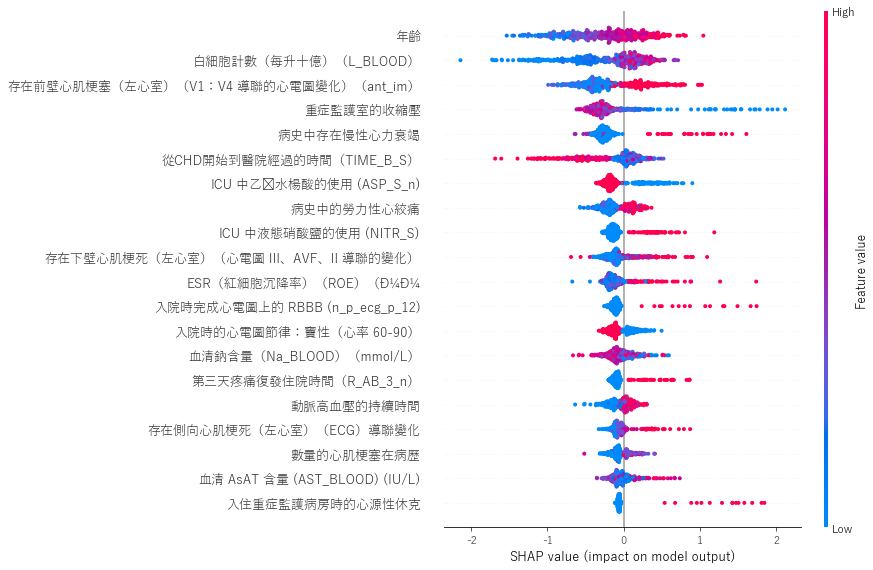

In [39]:
shap.summary_plot(shap_values,X_test_s)

============none upsampled======================================


In [40]:
co_result_tmp.columns=['年齡','性別','數量的心肌梗塞在病歷','病史中的勞力性心絞痛','上一年心絞痛功能等級','最近幾週（冠心病，冠心病）','存在原發性高血壓','有症狀的高血壓','動脈高血壓的持續時間','病史中存在慢性心力衰竭','觀察回憶中的心律失常','在病歷早產宮縮心房','病史中的室性早搏','病史中房顫的發作','持續形式的房顫（心房顫動）','心室顫動在病歷','病史中的室性陣發性心動過速','既往史中的一級 AV 阻滯','既往史中的三度 AV 阻滯','LBBB（前支）在病歷','病歷中的不完全','病史中的完全','不完全RBBB在病歷','在病歷（NP10）完整RBBB','糖尿病的既往病史','病史中的肥胖','甲狀腺毒症在病歷','在病歷慢性支氣管炎','在病歷31.Obstructive慢性支氣管炎','支氣管哮喘的既往史','慢性肺炎（zab_leg_04）','在既往病史（zab_leg_06）','重症監護室的收縮壓','重症監護室的舒張壓','入住重症監護病房時的肺水腫','入住重症監護病房時的心源性休克','入住重症監護病房時（或在院前階段）房顫發作 (MP_TP_POST)','入住重症監護病房時（或入院前階段）室上性心動過速的發作 (SVT_POST)','入住重症監護病房時（或在院前階段）室性心動過速的發作 (GT_POST)','心室顫動在入住重症監護病房時（或在院前階段）(FIB_G_POST)','存在前壁心肌梗塞（左心室）（V1：V4 導聯的心電圖變化）（ant_im）','存在側向心肌梗死（左心室）（ECG）導聯變化','存在下壁心肌梗死（左心室）（心電圖 III、AVF、II 導聯的變化）','存在後部心肌梗死（左心室）（V7 的心電圖變化：V9，導聯 V1 – V3 的交互變化）','右心室心肌梗塞 (IM_PG_P)','入院時的心電圖節律：竇性（心率 60-90）','ECG節律：心房纖維性顫動（ritm_ecg_p_02）','ECG節律：心房（ritm_ecg_p_04）','入院時心電圖節律：室性（ritm_ecg_p_06）','入院時心電圖節律心率高於 90 的竇（心動過速）','入院時心電圖心律：竇性心率低於 60（心動過緩','過早收縮 56入院時的心電圖 (n_r_ecg_p_01)','入院時心電圖頻繁出現房性早搏 (n_p2_g)ec','入院時心電圖上的室性早搏 (n_r_ecg_p_03)','入院時心電圖頻發室性早搏到醫院 (n_r_ecg_p_04)','入院時心電圖上的房顫發作 (n_r_5s_cg_)','入院時 ECG 上持續存在的房顫形式 (n_r_ecg_p_06)','陣發性心動過速的心室性心動過速 ECG','入院到醫院的時間（n_r_ecg_p_09）上ECG室性心動過速63發作','入院時心電圖上的心室顫動 (n_r_ecg_p_10)','入院時心電圖上的竇房阻滯 (n_p_ecg_p_01)','入院時心電圖一級房室傳導阻滯 (n_p_ecg_p_03)','1-6 度二度類型入院時心電圖顯示房室傳導阻滯（Mobitz I/Wenckebach）','入院時 (n_p_ecg_p_05) 心電圖顯示 2 型二度 AV 阻滯','入院時 ECG 上的 - 度 AV 阻滯 (n_p_ecg_p_06)','入院時 ECG 上的 LBBB（前支）到醫院 (n_p_ecg_p_07)','入院時心電圖上的 LBBB（後支）','不完全LBBB心電圖入院到醫院的時間（n_p_ecg_p_09）','入院時在 ECG 上完成 LBBB (n_p_ecg_p_10)','入院時 RBBB 不完整的 ECG醫院 (n_p_ecg_p_11)','入院時完成心電圖上的 RBBB (n_p_ecg_p_12)','溶栓治療（fibr_ter_01）','1米IU（fibr_ter_02）','溶栓治療（fibr_ter_03）','鏈蛋白酶 (fibr_ter_05) 的纖溶治療','IU溶栓治療（fibr_ter_06）','250k IU (fibr_ter_07) 的纖溶治療','纖溶治療由 1.5 breptionter_0 1.5 breptionter_0','低鉀血症 (GIPO_K)','血清鉀含量 (K_BLOOD) (mmol/L)','血清鈉增加（超過 150 mmol/L）（GIPER_Na）','血清鈉含量（Na_BLOOD）（mmol/L）','血清 AlAT 含量 (ALT_BLOOD) (IU/L)','血清 AsAT 含量 (AST_BLOOD) (IU/L)','白細胞計數（每升十億）（L_BLOOD）','ESR（紅細胞沉降率）（ROE）（Ð¼Ð¼','從CHD開始到醫院經過的時間（TIME_B_S）','入院前幾個小時疼痛復發期間（R_AB_1_n）','疼痛復發在住院期間的第二天（R_AB_2_n','第三天疼痛復發住院時間（R_AB_3_n）','ICU 中液態硝酸鹽的使用 (NITR_S)','住院最初幾個小時在 ICU 中使用阿片類藥物(NA_R_1_n)','住院第二天在 ICU 使用阿片類藥物（NA_R_2_n）','使用的阿片類藥物在醫院期間（NA_R_3_n）的第三天ICU','住院最初幾個小時在 ICU 中使用非甾體抗炎藥 (NOT_NA_1_n)','在醫院期間（NOT_NA_2_n）的第二天的ICU 104使用NSAID','住院第三天在 ICU 中使用非甾體抗炎藥（NOT_NA_3_n）','ICU 中利多卡因的使用 (LID_S_n)','在ICUβ受體阻滯劑（B_BLOK_S_n）','使用在ICU鈣通道阻滯劑（ANT_CA_S_n）','d°抗凝血劑（肝素）在ICU（GEPAR_S_n）的用途','ICU 中乙酰水楊酸的使用 (ASP_S_n)','在 ICU 中使用 Ticlid (TIKL_S_n)','在 ICU 中使用 Trental（TRENT_S_n）','致命結果']
co_result_tmp = shuffle(co_result_tmp)
co_result_tmp

,年齡,性別,數量的心肌梗塞在病歷,病史中的勞力性心絞痛,上一年心絞痛功能等級,最近幾週（冠心病，冠心病）,存在原發性高血壓,有症狀的高血壓,動脈高血壓的持續時間,病史中存在慢性心力衰竭,...,在醫院期間（NOT_NA_2_n）的第二天的ICU 104使用NSAID,住院第三天在 ICU 中使用非甾體抗炎藥（NOT_NA_3_n）,ICU 中利多卡因的使用 (LID_S_n),在ICUβ受體阻滯劑（B_BLOK_S_n）,使用在ICU鈣通道阻滯劑（ANT_CA_S_n）,d°抗凝血劑（肝素）在ICU（GEPAR_S_n）的用途,ICU 中乙酰水楊酸的使用 (ASP_S_n),在 ICU 中使用 Ticlid (TIKL_S_n),在 ICU 中使用 Trental（TRENT_S_n）,致命結果
1394,74,0,0,6,2,2,2,0,7,0,...,0,0,0,0,0,1,1,0,0,0
986,71,0,3,0,0,2,2,0,7,0,...,0,0,0,0,1,0,1,0,0,0
626,63,1,1,1,2,1,2,0,2,0,...,0,0,0,0,1,1,1,0,0,0
995,57,1,0,6,2,1,2,0,6,0,...,0,0,0,0,1,1,1,0,0,0
1438,50,1,1,1,2,1,1,0,1,0,...,1,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,52,1,0,0,0,2,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1493,77,1,3,6,2,1,3,0,7,0,...,0,0,0,0,1,0,0,0,1,1
566,74,0,0,6,2,1,2,0,7,2,...,0,0,0,0,0,1,1,0,0,0
4,60,1,0,0,0,2,3,0,7,0,...,0,0,0,0,1,0,1,0,1,0


Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


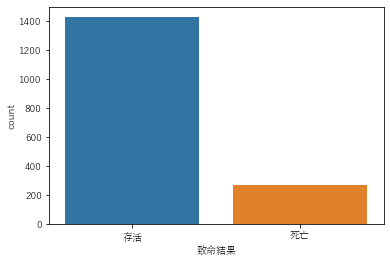

In [41]:
# check new class counts
co_result_tmp.致命結果.value_counts()
new_mort = sns.countplot(co_result_tmp['致命結果'])
new_mort.set_xticklabels(['存活', '死亡'])
plt.show()

In [42]:
co_result_tmp['致命結果'].value_counts()

0    1429
1     271
Name: 致命結果, dtype: int64

In [43]:
#切分資料集
from sklearn.model_selection import train_test_split
from sklearn import metrics
from  sklearn.datasets  import  make_hastie_10_2
from xgboost.sklearn import XGBClassifier

In [44]:
xfeatures = co_result_tmp[['年齡','性別','數量的心肌梗塞在病歷','病史中的勞力性心絞痛','上一年心絞痛功能等級','最近幾週（冠心病，冠心病）','存在原發性高血壓','有症狀的高血壓','動脈高血壓的持續時間',
                '病史中存在慢性心力衰竭','觀察回憶中的心律失常','在病歷早產宮縮心房','病史中的室性早搏','病史中房顫的發作','持續形式的房顫（心房顫動）','心室顫動在病歷','病史中的室性陣發性心動過速',
                '既往史中的一級 AV 阻滯','既往史中的三度 AV 阻滯','LBBB（前支）在病歷','病歷中的不完全','病史中的完全','不完全RBBB在病歷','在病歷（NP10）完整RBBB','糖尿病的既往病史','病史中的肥胖',
                '甲狀腺毒症在病歷','在病歷慢性支氣管炎','在病歷31.Obstructive慢性支氣管炎','支氣管哮喘的既往史','慢性肺炎（zab_leg_04）','在既往病史（zab_leg_06）','重症監護室的收縮壓',
                '重症監護室的舒張壓','入住重症監護病房時的肺水腫','入住重症監護病房時的心源性休克','入住重症監護病房時（或在院前階段）房顫發作 (MP_TP_POST)',
                '入住重症監護病房時（或入院前階段）室上性心動過速的發作 (SVT_POST)','入住重症監護病房時（或在院前階段）室性心動過速的發作 (GT_POST)','心室顫動在入住重症監護病房時（或在院前階段）(FIB_G_POST)',
                '存在前壁心肌梗塞（左心室）（V1：V4 導聯的心電圖變化）（ant_im）','存在側向心肌梗死（左心室）（ECG）導聯變化','存在下壁心肌梗死（左心室）（心電圖 III、AVF、II 導聯的變化）',
                '存在後部心肌梗死（左心室）（V7 的心電圖變化：V9，導聯 V1 – V3 的交互變化）','右心室心肌梗塞 (IM_PG_P)','入院時的心電圖節律：竇性（心率 60-90）','ECG節律：心房纖維性顫動（ritm_ecg_p_02）',
                'ECG節律：心房（ritm_ecg_p_04）','入院時心電圖節律：室性（ritm_ecg_p_06）','入院時心電圖節律心率高於 90 的竇（心動過速）','入院時心電圖心律：竇性心率低於 60（心動過緩',
                '過早收縮 56入院時的心電圖 (n_r_ecg_p_01)','入院時心電圖頻繁出現房性早搏 (n_p2_g)ec','入院時心電圖上的室性早搏 (n_r_ecg_p_03)','入院時心電圖頻發室性早搏到醫院 (n_r_ecg_p_04)',
                '入院時心電圖上的房顫發作 (n_r_5s_cg_)','入院時 ECG 上持續存在的房顫形式 (n_r_ecg_p_06)','陣發性心動過速的心室性心動過速 ECG','入院到醫院的時間（n_r_ecg_p_09）上ECG室性心動過速63發作',
                '入院時心電圖上的心室顫動 (n_r_ecg_p_10)','入院時心電圖上的竇房阻滯 (n_p_ecg_p_01)','入院時心電圖一級房室傳導阻滯 (n_p_ecg_p_03)',
                '1-6 度二度類型入院時心電圖顯示房室傳導阻滯（Mobitz I/Wenckebach）','入院時 (n_p_ecg_p_05) 心電圖顯示 2 型二度 AV 阻滯','入院時 ECG 上的 - 度 AV 阻滯 (n_p_ecg_p_06)',
                '入院時 ECG 上的 LBBB（前支）到醫院 (n_p_ecg_p_07)','入院時心電圖上的 LBBB（後支）','不完全LBBB心電圖入院到醫院的時間（n_p_ecg_p_09）','入院時在 ECG 上完成 LBBB (n_p_ecg_p_10)',
                '入院時 RBBB 不完整的 ECG醫院 (n_p_ecg_p_11)','入院時完成心電圖上的 RBBB (n_p_ecg_p_12)','溶栓治療（fibr_ter_01）','1米IU（fibr_ter_02）','溶栓治療（fibr_ter_03）',
                '鏈蛋白酶 (fibr_ter_05) 的纖溶治療','IU溶栓治療（fibr_ter_06）','250k IU (fibr_ter_07) 的纖溶治療','纖溶治療由 1.5 breptionter_0 1.5 breptionter_0','低鉀血症 (GIPO_K)',
                '血清鉀含量 (K_BLOOD) (mmol/L)','血清鈉增加（超過 150 mmol/L）（GIPER_Na）','血清鈉含量（Na_BLOOD）（mmol/L）','血清 AlAT 含量 (ALT_BLOOD) (IU/L)','血清 AsAT 含量 (AST_BLOOD) (IU/L)',
                '白細胞計數（每升十億）（L_BLOOD）','ESR（紅細胞沉降率）（ROE）（Ð¼Ð¼','從CHD開始到醫院經過的時間（TIME_B_S）','入院前幾個小時疼痛復發期間（R_AB_1_n）','疼痛復發在住院期間的第二天（R_AB_2_n',
                '第三天疼痛復發住院時間（R_AB_3_n）','ICU 中液態硝酸鹽的使用 (NITR_S)','住院最初幾個小時在 ICU 中使用阿片類藥物(NA_R_1_n)','住院第二天在 ICU 使用阿片類藥物（NA_R_2_n）',
                '使用的阿片類藥物在醫院期間（NA_R_3_n）的第三天ICU','住院最初幾個小時在 ICU 中使用非甾體抗炎藥 (NOT_NA_1_n)','在醫院期間（NOT_NA_2_n）的第二天的ICU 104使用NSAID',
                '住院第三天在 ICU 中使用非甾體抗炎藥（NOT_NA_3_n）','ICU 中利多卡因的使用 (LID_S_n)','在ICUβ受體阻滯劑（B_BLOK_S_n）','使用在ICU鈣通道阻滯劑（ANT_CA_S_n）',
                'd°抗凝血劑（肝素）在ICU（GEPAR_S_n）的用途','ICU 中乙酰水楊酸的使用 (ASP_S_n)','在 ICU 中使用 Ticlid (TIKL_S_n)','在 ICU 中使用 Trental（TRENT_S_n）'
                ]]
ylabels = co_result_tmp['致命結果']

In [45]:
xfeatures

,年齡,性別,數量的心肌梗塞在病歷,病史中的勞力性心絞痛,上一年心絞痛功能等級,最近幾週（冠心病，冠心病）,存在原發性高血壓,有症狀的高血壓,動脈高血壓的持續時間,病史中存在慢性心力衰竭,...,住院最初幾個小時在 ICU 中使用非甾體抗炎藥 (NOT_NA_1_n),在醫院期間（NOT_NA_2_n）的第二天的ICU 104使用NSAID,住院第三天在 ICU 中使用非甾體抗炎藥（NOT_NA_3_n）,ICU 中利多卡因的使用 (LID_S_n),在ICUβ受體阻滯劑（B_BLOK_S_n）,使用在ICU鈣通道阻滯劑（ANT_CA_S_n）,d°抗凝血劑（肝素）在ICU（GEPAR_S_n）的用途,ICU 中乙酰水楊酸的使用 (ASP_S_n),在 ICU 中使用 Ticlid (TIKL_S_n),在 ICU 中使用 Trental（TRENT_S_n）
1394,74,0,0,6,2,2,2,0,7,0,...,0,0,0,0,0,0,1,1,0,0
986,71,0,3,0,0,2,2,0,7,0,...,1,0,0,0,0,1,0,1,0,0
626,63,1,1,1,2,1,2,0,2,0,...,0,0,0,0,0,1,1,1,0,0
995,57,1,0,6,2,1,2,0,6,0,...,2,0,0,0,0,1,1,1,0,0
1438,50,1,1,1,2,1,1,0,1,0,...,1,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,52,1,0,0,0,2,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1
1493,77,1,3,6,2,1,3,0,7,0,...,0,0,0,0,0,1,0,0,0,1
566,74,0,0,6,2,1,2,0,7,2,...,0,0,0,0,0,0,1,1,0,0
4,60,1,0,0,0,2,3,0,7,0,...,0,0,0,0,0,1,0,1,0,1


In [46]:
ylabels

1394    0
986     0
626     0
995     0
1438    1
       ..
1070    0
1493    1
566     0
4       0
1406    0
Name: 致命結果, Length: 1700, dtype: int64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(xfeatures, ylabels, test_size=0.3, random_state=0)

In [48]:
#DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.8196078431372549

In [49]:
# knn
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.score(X_test, y_test)


0.8705882352941177

In [50]:
#LogisticRegression
logit = LogisticRegression(max_iter=5000, class_weight='balanced',penalty='l2')
logit.fit(X_train,y_train)
logit.score(X_test,y_test)

0.807843137254902

In [51]:
#RandomForestClassifier
rnf = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced")
rnf.fit(X_train,y_train)
rnf.score(X_test,y_test)

0.8705882352941177

In [52]:
clf = XGBClassifier(
        #樹的個數
        n_estimators=16,
        # 如同學習率
        learning_rate= 0.3, 
        # 構建樹的深度，越大越容易過擬合    
        max_depth=15, 
        # 隨機取樣訓練樣本 訓練例項的子取樣比
        subsample=1, 
        # 用於控制是否後剪枝的引數,越大越保守，一般0.1、0.2這樣子
        gamma=0, 
        # 控制模型複雜度的權重值的L2正則化項引數，引數越大，模型越不容易過擬合。
        reg_lambda=1,  
        
        #最大增量步長，我們允許每個樹的權重估計。
        max_delta_step=0,
        # 生成樹時進行的列取樣 
        colsample_bytree=1, 

        # 這個引數預設是 1，是每個葉子裡面 h 的和至少是多少，對正負樣本不均衡時的 0-1 分類而言
        # 假設 h 在 0.01 附近，min_child_weight 為 1 意味著葉子節點中最少需要包含 100 個樣本。
        #這個引數非常影響結果，控制葉子節點中二階導的和的最小值，該引數值越小，越容易 overfitting。
        min_child_weight=1, 

        #隨機種子
        seed=1000 
        
        # L1 正則項引數
#        reg_alpha=0,
        
        #如果取值大於0的話，在類別樣本不平衡的情況下有助於快速收斂。平衡正負權重
        #scale_pos_weight=1,
        
        #多分類的問題 指定學習任務和相應的學習目標
        #objective= 'multi:softmax', 
        
        # 類別數，多分類與 multisoftmax 並用
        #num_class=10,
        
        # 設定成1則沒有執行資訊輸出，最好是設定為0.是否在執行升級時列印訊息。
#        silent=0 ,
        # cpu 執行緒數 預設最大
#        nthread=4,
    
        #eval_metric= 'auc'
)

In [53]:
def CreateBalancedSampleWeights(y_train, largest_class_weight_coef):
    classes = np.unique(y_train, axis = 0)
    classes.sort()
    class_samples = np.bincount(y_train)
    total_samples = class_samples.sum()
    n_classes = len(class_samples)
    weights = total_samples / (n_classes * class_samples * 1.0)
    class_weight_dict = {key : value for (key, value) in zip(classes, weights)}
    class_weight_dict[classes[1]] = class_weight_dict[classes[1]] * largest_class_weight_coef
    sample_weights = [class_weight_dict[y] for y in y_train]
    return sample_weights

In [54]:
largest_class_weight_coef = max(co_result_tmp['致命結果'].value_counts().values)/co_result_tmp.shape[0]
    
#pass y_train as numpy array
weight = CreateBalancedSampleWeights(y_train, largest_class_weight_coef)

In [55]:
# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=xfeatures,label=ylabels)


In [56]:
### declare parameters
params ={'objective':'binary:logistic',
         'max_depth': 4,
         'alpha': 10,
         'learning_rate' : 1.0,
         'n_estimators':100
         }

In [57]:
# instantiate the classfier
xgb_clf = XGBClassifier(
    learning_rate =0.1,
    n_estimators=10000,
    max_depth=20000,
    subsample=1, 
    gamma=0,
    reg_lambda=1,
    max_delta_step=10,
    colsample_bytree=1,
    min_child_weight=1,
    seed=10
)

## Training XGBoost to the training set
xgb_clf.fit(X_train,y_train)

### score
xgb_clf.score(X_test,y_test)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[11:48:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8725490196078431

In [58]:
# 模型 訓練
clf.fit(X_train,y_train,eval_metric='auc')
# 預測值
y_pred=clf.predict(X_test)
# 真實值 賦值
y_true= y_test

# 計算精度
print("Accuracy : %.4g" % metrics.accuracy_score(y_true, y_pred))

Accuracy : 0.8765


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


In [59]:
# making predictions on the test data and confusion matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print('Model Accuracy Score:', accuracy_score(y_test,y_pred))

[[416  15]
 [ 48  31]]
Model Accuracy Score: 0.8764705882352941


In [60]:
print(list(clf.predict(X_test)))
print(list(y_test))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

In [61]:
# CatBoost
from catboost import CatBoostClassifier
catboost = CatBoostClassifier()
catboost.fit(X_train,y_train)
catboost.score(X_test,y_test)

Learning rate set to 0.011097
0:	learn: 0.6856098	total: 3.27ms	remaining: 3.27s
1:	learn: 0.6765942	total: 6.74ms	remaining: 3.37s
2:	learn: 0.6683459	total: 9.92ms	remaining: 3.3s
3:	learn: 0.6614177	total: 14.1ms	remaining: 3.51s
4:	learn: 0.6544130	total: 17.3ms	remaining: 3.44s
5:	learn: 0.6470325	total: 20.8ms	remaining: 3.44s
6:	learn: 0.6388831	total: 23.9ms	remaining: 3.39s
7:	learn: 0.6319608	total: 27.4ms	remaining: 3.39s
8:	learn: 0.6236064	total: 31.1ms	remaining: 3.42s
9:	learn: 0.6160535	total: 35.4ms	remaining: 3.51s
10:	learn: 0.6085121	total: 39.2ms	remaining: 3.52s
11:	learn: 0.6008988	total: 42.9ms	remaining: 3.53s
12:	learn: 0.5933529	total: 46.4ms	remaining: 3.52s
13:	learn: 0.5867482	total: 51.2ms	remaining: 3.6s
14:	learn: 0.5807028	total: 54.7ms	remaining: 3.59s
15:	learn: 0.5743885	total: 58.7ms	remaining: 3.61s
16:	learn: 0.5670517	total: 62.6ms	remaining: 3.62s
17:	learn: 0.5607794	total: 66.5ms	remaining: 3.63s
18:	learn: 0.5553000	total: 70.7ms	remaining: 

0.8901960784313725

In [62]:
y_predCat = catboost.predict(X_test)
cm = confusion_matrix(y_test, y_predCat)
print(cm)
accuracy_score(y_test,y_predCat)

[[423   8]
 [ 48  31]]


0.8901960784313725

In [63]:
import shap
shap.initjs()
## shap_values
explainer = shap.TreeExplainer(clf,X_train)
shap_values = explainer.shap_values(X_test)

Glyph 37232 missing from current font.
Glyph 37232 missing from current font.


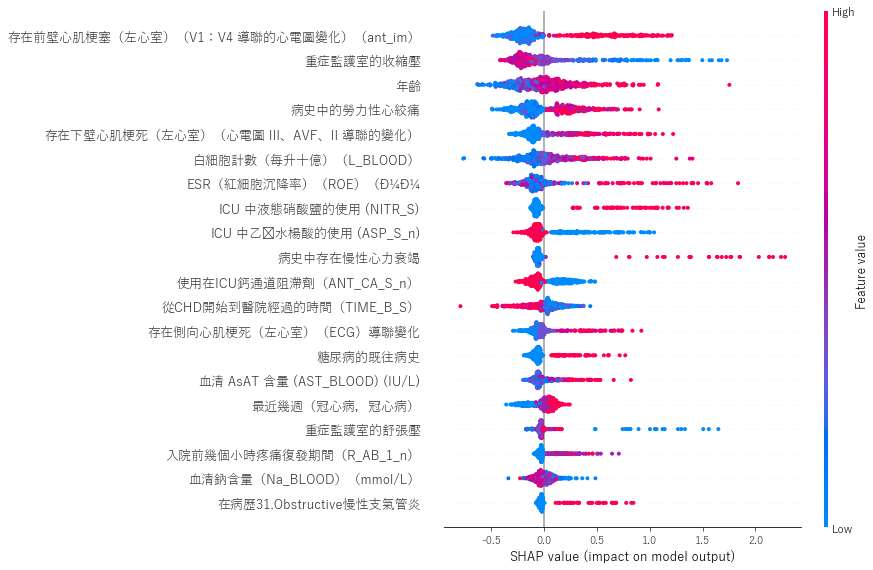

In [64]:
shap.summary_plot(shap_values,X_test)

                                    年齡        性別  數量的心肌梗塞在病歷  病史中的勞力性心絞痛  \
年齡                            1.000000 -0.396071    0.100162    0.246972   
性別                           -0.396071  1.000000    0.038797   -0.102654   
數量的心肌梗塞在病歷                    0.100162  0.038797    1.000000    0.331214   
病史中的勞力性心絞痛                    0.246972 -0.102654    0.331214    1.000000   
上一年心絞痛功能等級                    0.211494 -0.109766    0.337051    0.759035   
...                                ...       ...         ...         ...   
d°抗凝血劑（肝素）在ICU（GEPAR_S_n）的用途 -0.100040  0.039326   -0.027928   -0.016756   
ICU 中乙酰水楊酸的使用 (ASP_S_n)      -0.053304 -0.009398   -0.050555   -0.063275   
在 ICU 中使用 Ticlid (TIKL_S_n)  -0.057565  0.029608   -0.014459   -0.048921   
在 ICU 中使用 Trental（TRENT_S_n） -0.031919  0.059900    0.009607    0.007469   
致命結果                          0.203299 -0.118836    0.101718    0.179237   

                              上一年心絞痛功能等級  最近幾週（冠心病，冠心病）  存在原發性高血壓   有症狀的高血壓  \
年齡      

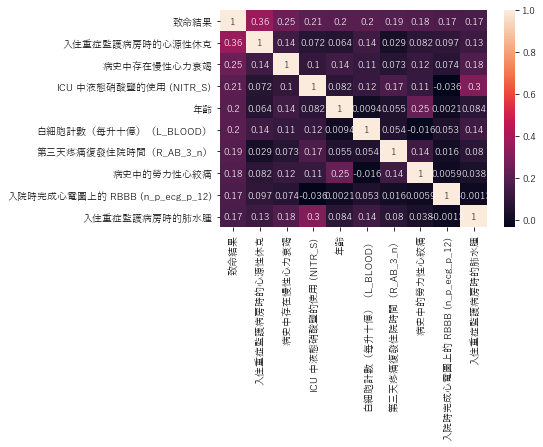

                                      年齡        性別  數量的心肌梗塞在病歷  病史中的勞力性心絞痛  \
致命結果                            0.203299 -0.118836    0.101718    0.179237   
入住重症監護病房時的心源性休克                 0.064101 -0.029883    0.098588    0.081871   
病史中存在慢性心力衰竭                     0.140608 -0.112156    0.171343    0.116851   
ICU 中液態硝酸鹽的使用 (NITR_S)          0.082288 -0.052498    0.149074    0.112055   
年齡                              1.000000 -0.396071    0.100162    0.246972   
白細胞計數（每升十億）（L_BLOOD）            0.009433  0.011937   -0.009381   -0.015757   
第三天疼痛復發住院時間（R_AB_3_n）           0.055004 -0.037147    0.099280    0.138044   
病史中的勞力性心絞痛                      0.246972 -0.102654    0.331214    1.000000   
入院時完成心電圖上的 RBBB (n_p_ecg_p_12)  0.002084  0.014493    0.026656    0.005891   
入住重症監護病房時的肺水腫                   0.084033 -0.088538    0.110509    0.038255   

                                上一年心絞痛功能等級  最近幾週（冠心病，冠心病）  存在原發性高血壓   有症狀的高血壓  \
致命結果                              0.150697       0.119581  0

In [65]:
corrmat = co_result.corr()
print (corrmat)

###打印如下###
#                    Id  MSSubClass  LotFrontage   LotArea  OverallQual     ...
# Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   ...
# MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   ...
# LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   ...
# LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   ...
# OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   ...
# OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   ...
...

# 得到saleprice相对系数前十大的数据 
corrmat = co_result.corr()
cols = corrmat.nlargest(10,'致命結果').index
largest_price = co_result[cols].corr()

# 绘制这前十的相关系数的热点图,其中annot=True表示将数值写入格子
sns.heatmap(largest_price,annot=True, xticklabels=largest_price.columns,yticklabels=largest_price.index)
plt.show()

print (corrmat.nlargest(10,'致命結果'))
